# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data set

In [2]:
house=pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house=house.drop(['id','date','lat','long'],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


# Getting to Know your data

In [4]:
house.shape

(21613, 17)

In [5]:
house.index

RangeIndex(start=0, stop=21613, step=1)

In [6]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [8]:
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [22]:
house.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

# Visualizing the data sets

C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


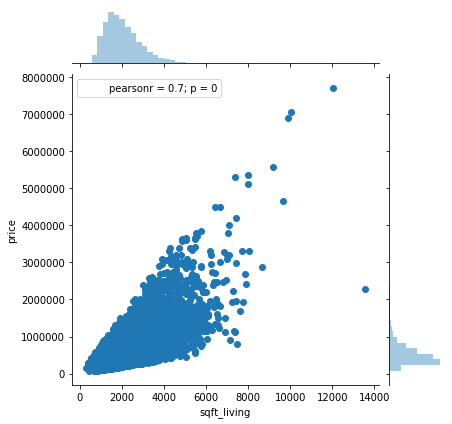

In [12]:
sns.jointplot(x=house.sqft_living,y=house.price)

C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


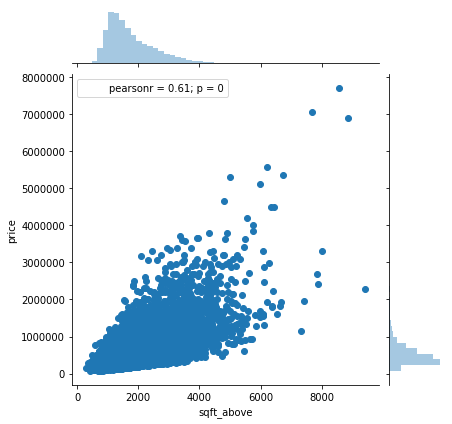

In [23]:
sns.jointplot(x=house.sqft_above,y=house.price)

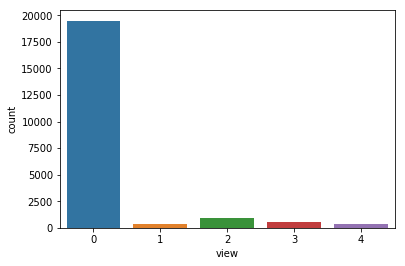

In [24]:
sns.countplot(house.view)

In [37]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# Normalize the data

In [40]:
house['price'] = ((house['price']-house['price'].min())/(house['price'].max()-house['price'].min()))

house['bedrooms'] = ((house['bedrooms']-house['bedrooms'].min())/(house['bedrooms'].max()-house['bedrooms'].min()))

house['bathrooms'] = ((house['bathrooms']-house['bathrooms'].min())/(house['bathrooms'].max()-house['bathrooms'].min()))

house['sqft_living'] = ((house['sqft_living']-house['sqft_living'].min())/(house['sqft_living'].max()-house['sqft_living'].min()))

house['sqft_lot'] = ((house['sqft_lot']-house['sqft_lot'].min())/(house['sqft_lot'].max()-house['sqft_lot'].min()))

house['waterfront'] = ((house['waterfront']-house['waterfront'].min())/(house['waterfront'].max()-house['waterfront'].min()))

house['view'] = ((house['view']-house['view'].min())/(house['view'].max()-house['view'].min()))

house['condition'] = ((house['condition']-house['condition'].min())/(house['condition'].max()-house['condition'].min()))

house['grade'] = ((house['grade']-house['grade'].min())/(house['grade'].max()-house['grade'].min()))

house['sqft_above'] = ((house['sqft_above']-house['sqft_above'].min())/(house['sqft_above'].max()-house['sqft_above'].min()))

house['sqft_basement'] = ((house['sqft_basement']-house['sqft_basement'].min())/(house['sqft_basement'].max()-house['sqft_basement'].min()))

house['yr_built'] = ((house['yr_built']-house['yr_built'].min())/(house['yr_built'].max()-house['yr_built'].min()))

house['yr_renovated'] = ((house['yr_renovated']-house['yr_renovated'].min())/(house['yr_renovated'].max()-house['yr_renovated'].min()))

house['zipcode'] = ((house['zipcode']-house['zipcode'].min())/(house['zipcode'].max()-house['zipcode'].min()))

house['sqft_living15'] = ((house['sqft_living15']-house['sqft_living15'].min())/(house['sqft_living15'].max()-house['sqft_living15'].min()))

house['sqft_lot15'] = ((house['sqft_lot15']-house['sqft_lot15'].min())/(house['sqft_lot15'].max()-house['sqft_lot15'].min()))



# Preparing the datasets

In [41]:
#import scitic libraries
from sklearn.model_selection import train_test_split as tts
train,test=tts(house, test_size=0.2)

In [42]:
train_x=train.loc[:, train.columns != 'price']
test_x=test.loc[:, train.columns != 'price']

train_y=train['price']
test_y=test['price']

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predict the values

In [44]:
test_pred=model.predict(test_x)

In [45]:
result=pd.DataFrame({'Actual_price':test_y,'Predicted_price':test_pred})
print(result)

       Actual_price  Predicted_price
7339       0.024656         0.037762
5756       0.020984         0.020027
6821       0.035672         0.054706
6781       0.018623         0.015779
16243      0.029508         0.033059
3044       0.050033         0.051113
798        0.051803         0.057414
821        0.030944         0.047980
20272      0.075410         0.065400
21532      0.163934         0.153220
2653       0.121311         0.115324
14309      0.065836         0.067736
7158       0.041311         0.035498
3495       0.023607         0.040595
5998       0.068721         0.094370
8795       0.024918         0.028202
2764       0.040656         0.028836
1890       0.062295         0.073070
2819       0.022689         0.045534
2500       0.081967         0.059806
6858       0.025574         0.036866
16442      0.061508         0.038278
9462       0.030820         0.028769
16309      0.033443         0.039043
12172      0.047475         0.051531
7745       0.026230         0.031668
1

# Finding erros

In [48]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
print(mae(test_y,test_pred)*100)
print(mse(test_y,test_pred)*100)

1.8407741009322058
0.07797933814800222


# computing r2 score to predict the accuracy of model

In [47]:
from sklearn.metrics import r2_score
print(r2_score(test_y,test_pred)*100)

62.84109603477723


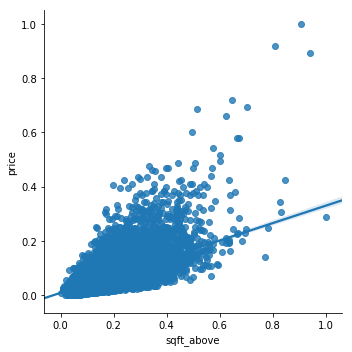

In [55]:
sns.lmplot(x="sqft_above", y="price", data=house);

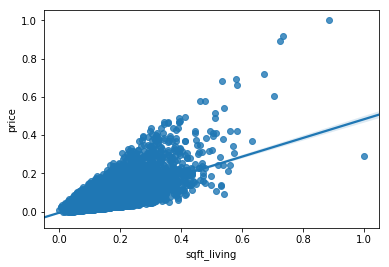

In [57]:
sns.regplot(x="sqft_living", y="price", data=house);

C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


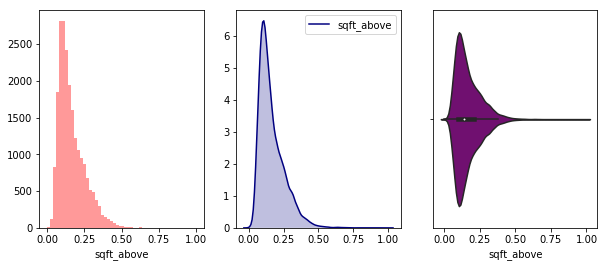

In [67]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.distplot(house.sqft_above,color='red',kde=False)
plt.subplot(1,3,2)
sns.kdeplot(house.sqft_above,color='navy',shade=True)
plt.subplot(1,3,3)
sns.violinplot(house.sqft_above,color='purple')

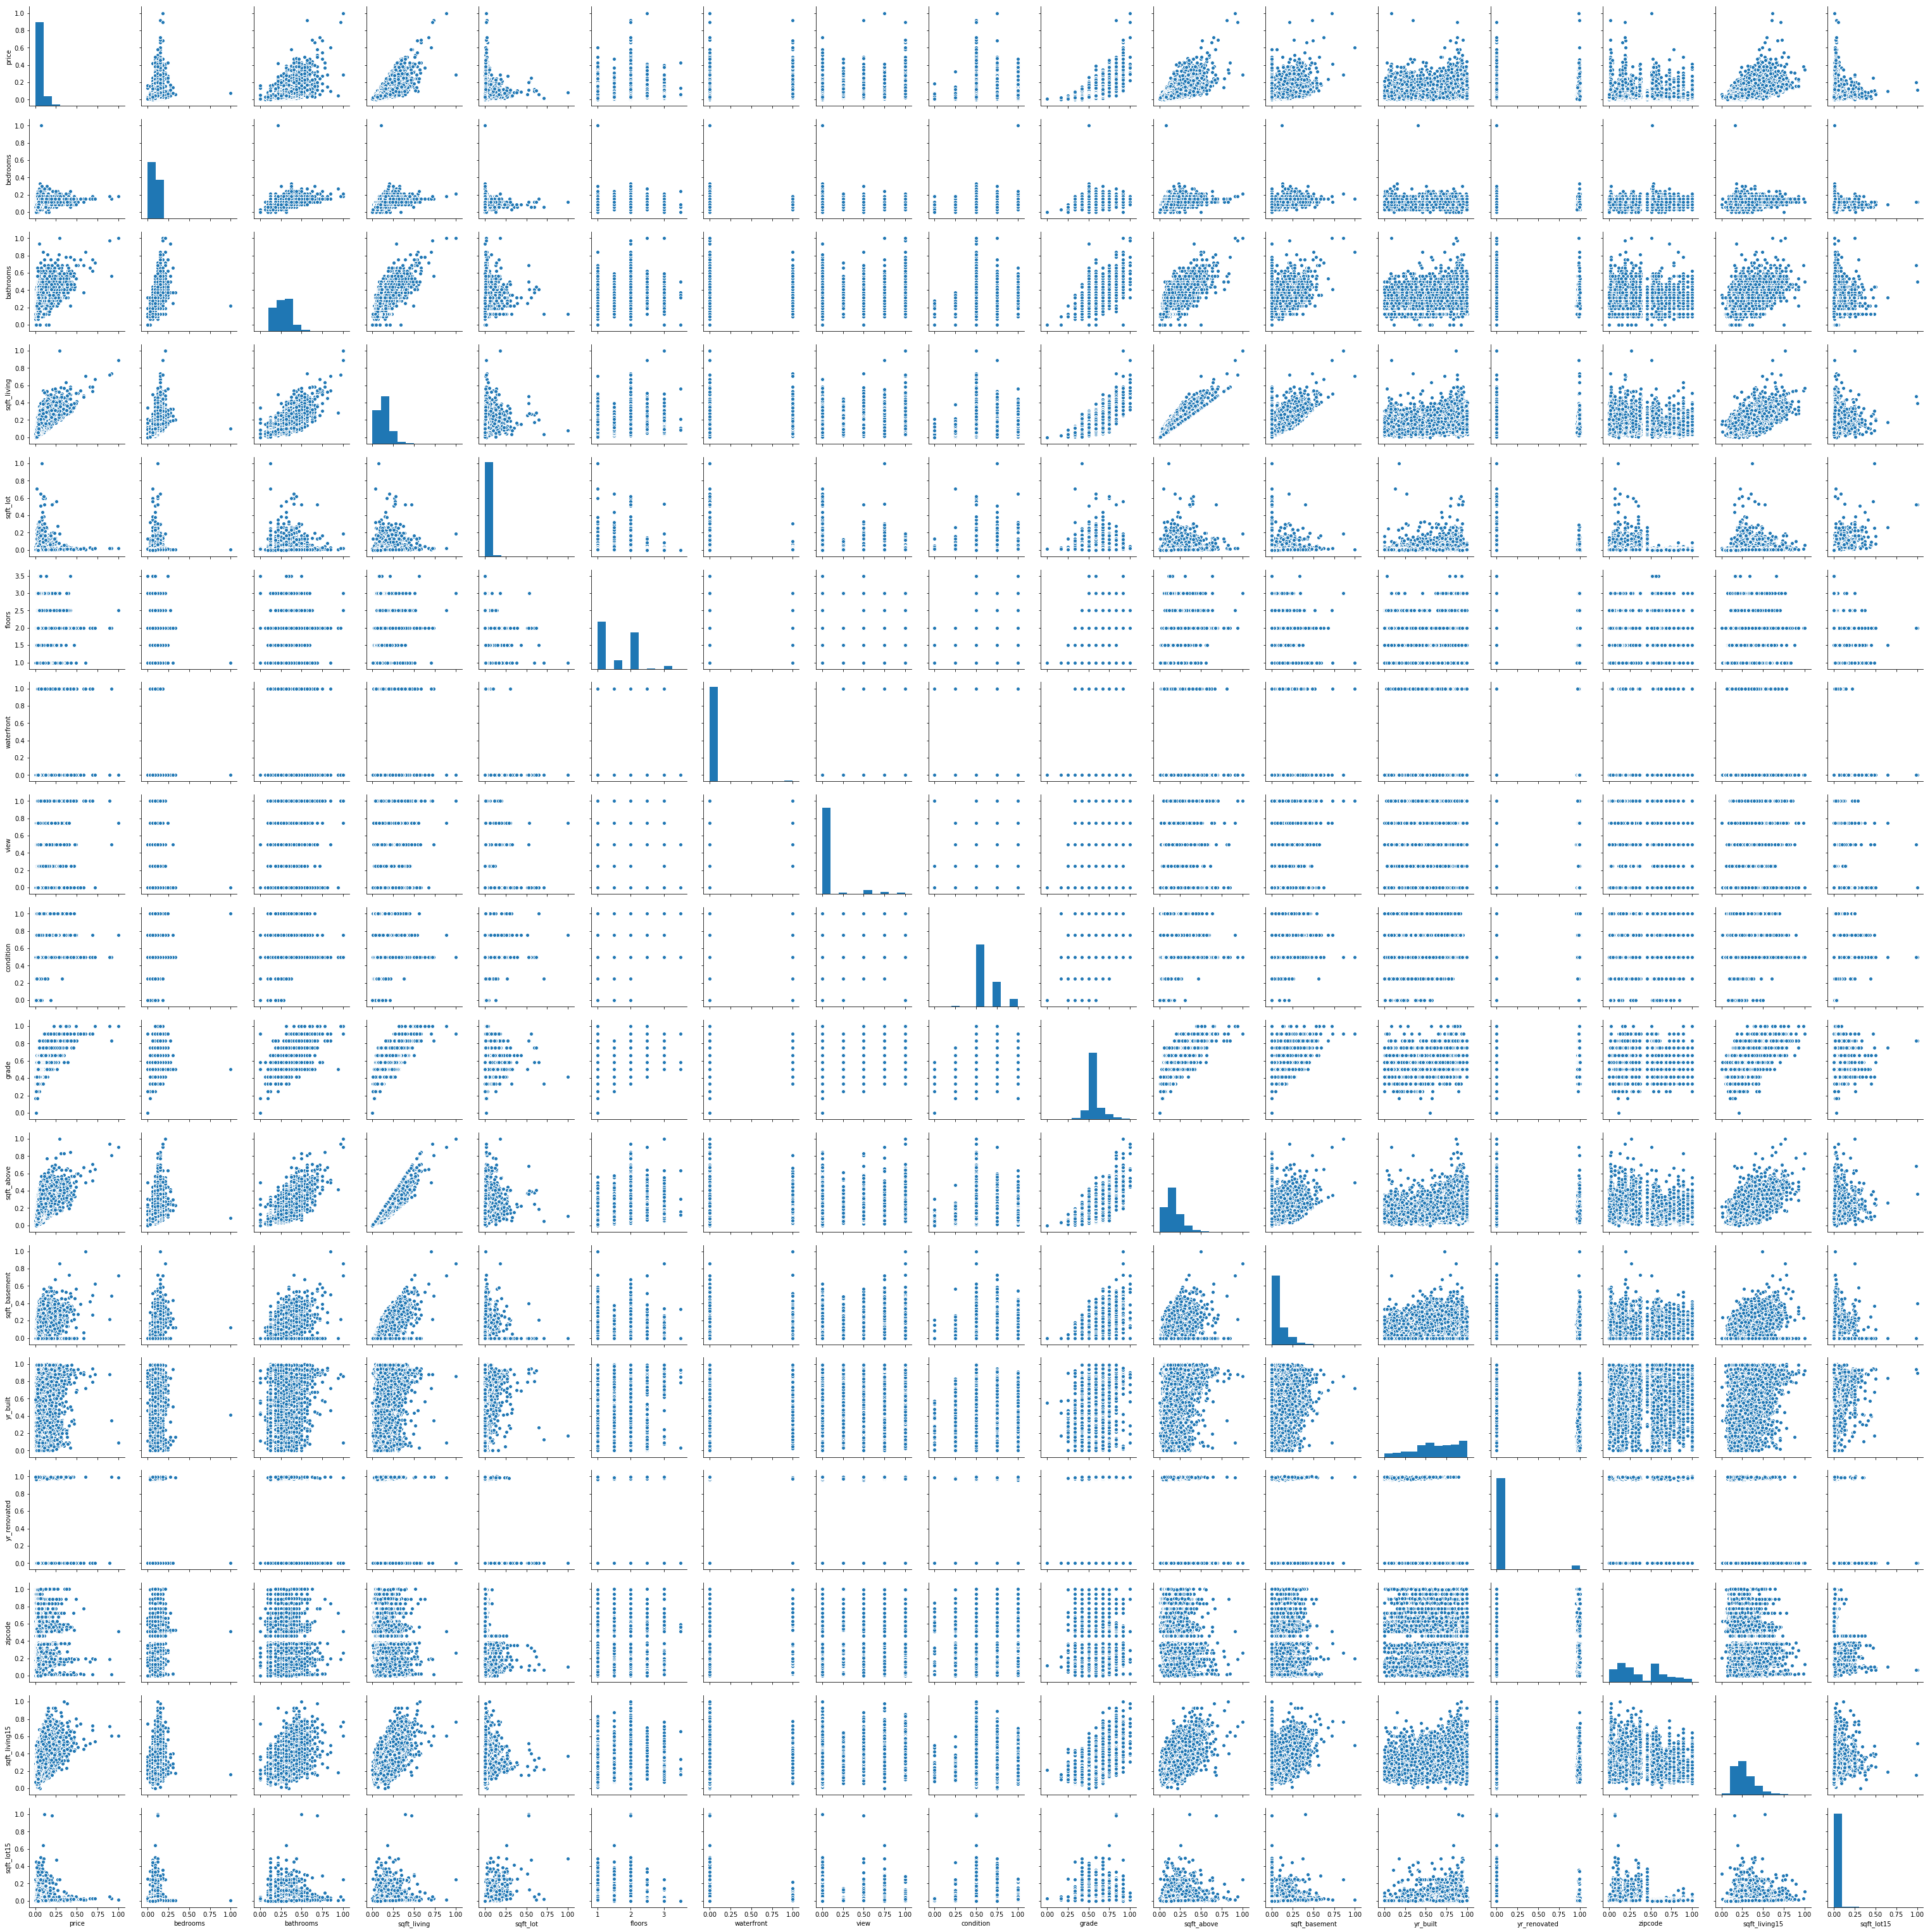

In [62]:
sns.pairplot(house)

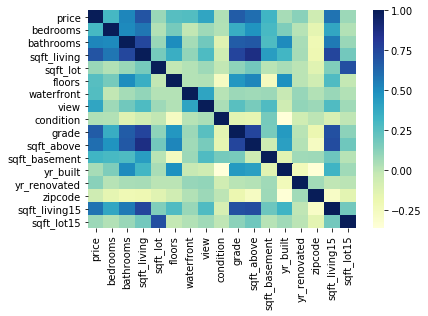

In [65]:
corr_matrix=house.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")